In [1]:
from sympy import *
init_printing()

O modelo matemático do VSS será obtido via mecânica Lagrangeana, isto é,

$$ \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) + \frac{\partial L}{\partial q} = M - \Lambda^T(q) \lambda $$

sendo $L = T - E_p$, $T$ representa a energia cinética e $E_p$ a energia potencial, $M$ é um vetor de forças externas generalizadas, $\Lambda$ representa as restrições do sistema, tal que $\Lambda(q)\dot{q} = 0$, $\Lambda$ é um vetor com os multiplicadores de Lagrange e $q$ é o vetor com o estado do sistema: 

$$ 
q = \left[ \begin{array}{c} x         \\ 
                            y         \\ 
                            \theta    \\ 
                            \varphi_r \\
                            \varphi_l
           \end{array} \right] 
$$

Esquemático do robô:

![desenho_robo.png](attachment:desenho_robo.png)

Variáveis generalizadas:

$x$ e $y$ são as coordenadas de posição do robô, $\theta$ é o ângulo de orientação e $\varphi_r$ e $\varphi_l$ são os ângulos das rodas direita e esquerda, respectivamente.

São consideradas duas hipóteses sobre o movimento do robô:

1. Não há escorregamento lateral e
2. As rodas não escorregam

A partir dessas hipóteses pode-se concluir que:

$$\dot{y}_r = 0$$

e 

$$ \dot{x}_r + L \dot{\theta} = R \varphi_{r} $$

$$ \dot{x}_r - L \dot{\theta} = R \varphi_{r} $$

sendo $\dot{x}_r$ e $\dot{y}_r$ as coordenadas de posição no eixo do robô (Dhaouadi e Hatab, 2013). 


In [15]:
# Parâmetros do robô
R, L = symbols('R L', real=True)

# Vareiáveis
x = Function('x')(t)
y = Function('y')(t)
theta = Function('\\theta')(t)
phi_r = Function('\\varphi_r')(t)
phi_l = Function('\\varphi_l')(t)
t = symbols('t', real=True)
dx = diff(x, t)
dy = diff(y, t)
dtheta = diff(theta, t)
dphi_r = diff(phi_r, t)
dphi_l = diff(phi_l, t)
q = Matrix([x, y, theta, phi_r, phi_l])
dq = Matrix([dx, dy, dtheta, dphi_r, dphi_l])

In [16]:
# Parâmetros do robô
R, L = symbols('R L', real=True)

# Vareiáveis
x, y, theta, phi_r, phi_l, t = symbols('x y \\theta \\varphi_r \\varphi_l t', real=True)
dx, dy, dtheta, dphi_r, dphi_l = symbols('\dot{x} \dot{y} \dot{\\theta} \dot{\\varphi_r} \dot{\\varphi_l}', real=True)
q = Matrix([x, y, theta, phi_r, phi_l])
dq = Matrix([dx, dy, dtheta, dphi_r, dphi_l])

As restrições obtidas por meio dessas duas hipóteses estão escritas no eixo de coordenadas do robô. Para reescrevê-las no eixo de coordenadas global, deve-se utilizar a seguinte matriz de rotação:

$$ \left[ \begin{array}{c} \dot{x} \\ \dot{y} \end{array} \right] = 
   \underbrace{\left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right]}_{R(\theta)}
   \left[ \begin{array}{c} \dot{x}_r \\ \dot{y}_r \end{array} \right] $$

Como $R(\theta)$ é uma matriz ortogonal, então $R^{-1}(\theta) = R^T(\theta)$. Logo, 

$$ \left[ \begin{array}{c} \dot{x}_r \\ \dot{y}_r \end{array} \right] = 
   \left[ \begin{array}{cc} \cos(\theta) & \sin(\theta) \\ -\sin(\theta) & \cos(\theta) \end{array} \right] 
   \left[ \begin{array}{c} \dot{x} \\ \dot{y} \end{array} \right] $$

Dessa equação, pode-se concluir que:
- $\dot{x}_r =  \dot{x} \cos(\theta) + \dot{y} \sin(\theta)$
- $\dot{y}_r = -\dot{x} \sin(\theta) + \dot{y} \cos(\theta) = 0$

Ao substituir $\dot{x}_r$ nas equações das hipóteses iniciais, obtém-se:
- $\dot{x} \cos(\theta) + \dot{y} \sin(\theta) + L \dot{\theta} = R \varphi_{r}$
- $\dot{x} \cos(\theta) + \dot{y} \sin(\theta) - L \dot{\theta} = R \varphi_{r}$

Dessas equações, pode-se escrever a matriz de restrições $\Lambda(q)\dot{q} = 0_{3 \times 1}$:

$$ \Lambda(q) = \left[ \begin{array}{ccccc} 
                         -\sin(\theta) & \cos(\theta) & 0  &  0 &  0 \\
                          \cos(\theta) & \sin(\theta) &  L & -R &  0 \\
                          \cos(\theta) & \sin(\theta) & -L &  0 & -R
                       \end{array} \right] $$







In [4]:
Lambda = Matrix([[-sin(theta), cos(theta),  0,  0,  0],
                 [ cos(theta), sin(theta),  L, -R,  0],
                 [ cos(theta), sin(theta), -L,  0, -R]])

Como os robôs se movimentam apenas na horizontal, não há variação da energia potencial, apenas da energia cinética, que é data por:

$$ L = T = \frac{1}{2} m|v_{cm}|^2 + \frac{1}{2} I \dot{\theta}^2 + \frac{1}{2} I_w (\dot{\varphi_r}^2 + \dot{\varphi_r}^2) $$

sendo:
- $m$ a massa do robô,
- $v_{cm}$ a velocidade linear do centor de massa do robô,
- $I$ o momento de inércia do robô com respeito ao centro de massa,
- $I_w$ o momento de inércia da roda com respeito ao seu centro de massa

Caso o centro de massa do robô não esteja sobre a origem do eixo de coordenadas do robô, então o centro de massa está na posição $(x_{cm}, y_{cm})$, do eixo do robô. Nesse contexto, a velocidade $v_{cm}$ pode ser escrita como:

$$ v_{cm} = \left[ \begin{array}{c} 
                 \dot{x} \cos(\theta) + \dot{y} \sin(\theta) - \dot{\theta} y_{cm} \\
                -\dot{x} \sin(\theta) + \dot{y} \cos(\theta) + \dot{\theta} x_{cm} \\
                0
            \end{array} \right] $$



In [14]:
m, xcm, ycm, I, Iw = symbols('m x_{cm}, y_{cm} I I_w', real=True)

vcm = Matrix([[ dx*cos(theta) + dy*sin(theta) - dtheta*ycm],
              [-dx*sin(theta) + dy*cos(theta) + dtheta*xcm],
              [ 0]])

T = 0.5*(m*(vcm.norm())**2 + I*dtheta**2 + Iw*(dphi_r**2 + dphi_l**2))

Ao substituir a Equação da energia cinética na expressão de Lagrange, o resultado obtido pode ser escrito matricialmente como:

$$ H(q)\ddot{q} + C(q, \dot{q}) \dot{q} = B(q) u - \Lambda^T(q) \lambda $$

com

$$ H(q) = \left[ \begin{array}{ccccc} 
              m & 0 & -m x_{cm} \sin(\theta) -m y_{cm} \cos(\theta) & 0 & 0 \\
              0 & m &  m x_{cm} \cos(\theta) -m y_{cm} \sin(\theta) & 0 & 0 \\
              -m x_{cm} \sin(\theta) -m y_{cm} \cos(\theta) & m x_{cm} \cos(\theta) -m y_{cm} \sin(\theta) & I_C & 0 & 0 \\
              0 & 0 & 0 & I_w & 0 \\
              0 & 0 & 0 & 0 & I_w
          \end{array} \right] $$

$$ I_C = m x_{cm}^2 + m y_{cm}^2 + I $$

$$ C(q, \dot{q}) = \left[ \begin{array}{ccccc}
                           0 & 0 & -m \dot{\theta} x_{cm} \cos(\theta) + m \dot{\theta} y_{cm} \sin(\theta) & 0 & 0 \\
                           0 & 0 & -m \dot{\theta} x_{cm} \sin(\theta) - m \dot{\theta} y_{cm} \cos(\theta) & 0 & 0 \\
                           0 & 0 & 0 & 0 & 0 \\
                           0 & 0 & 0 & 0 & 0 \\
                           0 & 0 & 0 & 0 & 0
                         \end{array} 
                  \right]
$$

$$ B(q) = \left[ \begin{array}{c}  
                   0_{3 \times 2} \\
                   I_{2 \times 2}
                 \end{array} 
          \right]
$$

$$ u = \left[ \begin{array}{c}  
                \tau_{R} \\
                \tau_{L}
              \end{array} 
       \right]
$$

Vale notar que $I_{2 \times 2}$ representa uma matriz identidade com duas linhas e duas colunas.








In [10]:
tauR, tauL = symbols('\\tau_R \\tau_L', real=True)
Ic = m*xcm**2 + m*ycm**2 + I
H = Matrix([[m, 0, -m*xcm*sin(theta) - m*ycm*cos(theta), 0, 0],
            [0, m,  m*xcm*cos(theta) - m*ycm*sin(theta), 0, 0],
            [-m*xcm*sin(theta)-m*ycm*cos(theta), m*xcm*cos(theta) - m*ycm*sin(theta), Ic, 0, 0],
            [0, 0, 0, Iw, 0],
            [0, 0, 0, 0, Iw]])
C = Matrix([[0, 0, -m*dtheta*xcm*cos(theta) +m*dtheta*ycm*sin(theta), 0, 0],
            [0, 0, -m*dtheta*xcm*sin(theta) -m*dtheta*ycm*cos(theta), 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0]])
B = Matrix([[0, 0],
            [0, 0],
            [0, 0],
            [1, 0],
            [0, 1]])
u = Matrix([[tauR],
            [tauL]])

Nesse artigo, os autores fazem uma transformação para reduzir o número de variáveis de estado. A ideia é modelar apenas a velocidade do robô em função das velocidades das rodinhas. Cabe salientar que essa simplificação é plausível no caso de apenas fazer os projetos embarcados do robô. Desse modo, o modelo dinâmico obtido não pode ser utilizado para a implementação de um simulador, por exemplo, pois faltaria representar a dinâmica da posição.

Considere, então, a transformação:

$$ \dot{q} = S(q) \eta $$

sendo 

$$ S(q) = \left[\begin{matrix}\frac{R}{2} \cos{\left (\theta \right )} & \frac{R}{2} \cos{\left (\theta \right )}\\\frac{R}{2} \sin{\left (\theta \right )} & \frac{R}{2} \sin{\left (\theta \right )}\\\frac{R}{2 L} & - \frac{R}{2 L}\\1 & 0\\0 & 1\end{matrix}\right] $$

e 

$$ \eta = \left[\begin{matrix}\dot{\varphi_r}\\\dot{\varphi_l}\end{matrix}\right] = \left[\begin{matrix} \omega_r  \\ \omega_l\end{matrix}\right] $$

Vale notar que a transformação não altera vetor de estados.

Finalmente, 

$$ \dot{\eta} = \left[ \begin{array}{c} \dot{\omega_r} \\ \dot{\omega_l} \end{array} \right] $$

In [41]:
S = Matrix([[(R/2)*cos(theta), (R/2)*cos(theta)],
            [(R/2)*sin(theta), (R/2)*sin(theta)],
            [R/(2*L), -R/(2*L)],
            [1, 0],
            [0, 1]])
omega_r, omega_l, domega_r, domega_l = symbols('\\omega_r \\omega_l \dot{\\omega}_r \dot{\\omega}_l', real=True)
eta = Matrix([[omega_r],
              [omega_l]])
deta = Matrix([[domega_r],
               [domega_l]])

Após a transformação do vetor de estados, a nova equação dinâmica é escrita como

$$ \bar{H} \dot{\eta} + \bar{C} \eta = u $$

com

$$ \bar{H} = \left[\begin{matrix}I_{w} + \frac{R^{2}}{4 L^{2}} \left(I + L^{2} m - 2 L m y_{cm} + m x_{cm}^{2} + m y_{cm}^{2}\right) & \frac{R^{2}}{4 L^{2}} \left(- I + L^{2} m - m x_{cm}^{2} - m y_{cm}^{2}\right)\\\frac{R^{2}}{4 L^{2}} \left(- I + L^{2} m - m x_{cm}^{2} - m y_{cm}^{2}\right) & I_{w} + \frac{R^{2}}{4 L^{2}} \left(I + L^{2} m + 2 L m y_{cm} + m x_{cm}^{2} + m y_{cm}^{2}\right)\end{matrix}\right] $$

$$ \bar{C} = \left[\begin{matrix}0 & \frac{R^{2} \dot{\theta} m x_{cm}}{2 L}\\- \frac{R^{2} \dot{\theta} m x_{cm}}{2 L} & 0\end{matrix}\right] $$




In [42]:
I1 = Iw + (R**2 / (4*L**2)) * (Ic - 2*m*L*ycm + m*L**2)
I2 = (R**2 / (4*L**2)) * (m*L**2 - Ic)
I3 = Iw + (R**2 / (4*L**2)) * (Ic + 2*m*L*ycm + m*L**2)
Hb = Matrix([[I1, I2],
             [I2, I3]])
Cb = Matrix([[0, (R**2/(2*L))*m*xcm*dtheta],
             [-(R**2/(2*L))*m*xcm*dtheta, 0]])

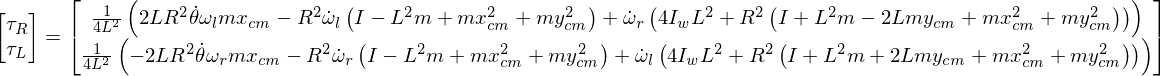

In [47]:
simplify(Eq(Hb*deta + Cb*eta, u))